# **Plot skin friction *Cf* for the solver "datadriven_wmSimpleFoam"**

1. No wall function

2. With standard wall function

3. Data-driven wall function with correction at the wall

4. Data-driven wall function with additional correction at the first face

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
UInf = 69.4
nuInf = 1.388e-05

model_sa = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
tauw_path_nowall = [run + 'turbulentFlatPlate_SA_noWallFunc/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall = [pd.read_csv(tauw_path_nowall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [4]:
tauw_path_wall = [run + 'turbulentFlatPlate_SA/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall = [pd.read_csv(tauw_path_wall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [5]:
tauw_path_ddwall = [run + 'turbulentFlatPlate_onlyWall/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall = [pd.read_csv(tauw_path_ddwall[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,0.044530,1.000001,6.180830e-07,0.000014,2.964710e+06,837141.725520,1.001223e-11,6.657710e+07,2.895814e+06,18.497634,0.016905,19.302191,0.020932,76.027947,76.191244,-0.003268,0.260942
1,0.001458,0.057081,1.000000,7.922801e-07,0.000014,1.606910e+06,821469.822862,3.082805e-12,2.815156e+07,1.608274e+06,7.821568,0.003851,8.268407,0.004881,26.358804,26.399371,-0.003268,0.097871
2,0.002433,0.071337,1.000000,9.901606e-07,0.000014,1.204220e+06,797833.152955,1.947132e-12,1.688066e+07,1.204183e+06,4.690088,0.001242,5.024655,0.001591,19.461234,19.474244,-0.003268,0.050039
3,0.003410,0.088996,1.000000,1.235269e-06,0.000014,1.047753e+06,777236.114737,1.527977e-12,1.177298e+07,1.047698e+06,3.270981,0.000538,3.562071,0.000697,18.297708,18.303282,-0.003268,0.028363
4,0.004390,0.100570,1.000000,1.395918e-06,0.000014,9.676514e+05,760921.709577,1.325055e-12,9.621625e+06,9.676713e+05,2.673252,0.000211,2.942108,0.000277,18.566012,18.568246,-0.003268,0.019233


In [6]:
tauw_path_ddface = [run + 'turbulentFlatPlate_1stface/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface = [pd.read_csv(tauw_path_ddface[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,1.080082e-01,0.006539,1.499154e-06,9.075492e-08,737841.452491,678588.697518,-0.000014,6.831346e+06,1.037829e+08,1.897995e+00,6.737652e-03,30.732829,0.013969,9.620554e+07,9.620554e+07,-0.003268,0.007391
1,0.001458,3.271978e+35,0.002692,4.541505e+30,3.735940e-08,384285.763430,294892.800807,-0.000014,1.174475e-30,1.095604e+08,3.263112e-37,1.298846e-39,30.440045,0.000228,9.620524e+07,9.620524e+07,-0.003268,-0.021600
2,0.002433,1.042874e+35,0.002650,1.447509e+30,3.678099e-08,384285.763430,294892.800807,-0.000014,3.684873e-30,1.112834e+08,1.023796e-36,1.736730e-39,30.918737,-0.000102,9.620516e+07,9.620516e+07,-0.003268,-0.021600
3,0.003410,7.223985e+34,0.002632,1.002689e+30,3.652688e-08,384285.763430,294892.800807,-0.000014,5.319581e-30,1.120575e+08,1.477981e-36,1.041267e-39,31.133829,-0.000057,9.620504e+07,9.620504e+07,-0.003268,-0.021600
4,0.004390,4.546415e+34,0.002626,6.310424e+29,3.644963e-08,384285.763430,294892.800807,-0.000014,8.452500e-30,1.122950e+08,2.348425e-36,4.701312e-40,31.199814,-0.000031,9.620506e+07,9.620506e+07,-0.003268,-0.021600


In [7]:
x0 = 0
Rex = (tauw_data_nowall[0]['ccx'] - x0)*UInf/nuInf
Cf_nowall = [np.sqrt(tauw_data_nowall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_wall = [np.sqrt(tauw_data_wall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_wall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_wall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_ddwall = [tauw_data_ddwall[i + len(res_list)*j]['nuEff_wall']*tauw_data_ddwall[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_ddface = [tauw_data_ddface[i + len(res_list)*j]['nuEff_wall']*tauw_data_ddface[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

In [8]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

### Comparison of *Cf* for various settings

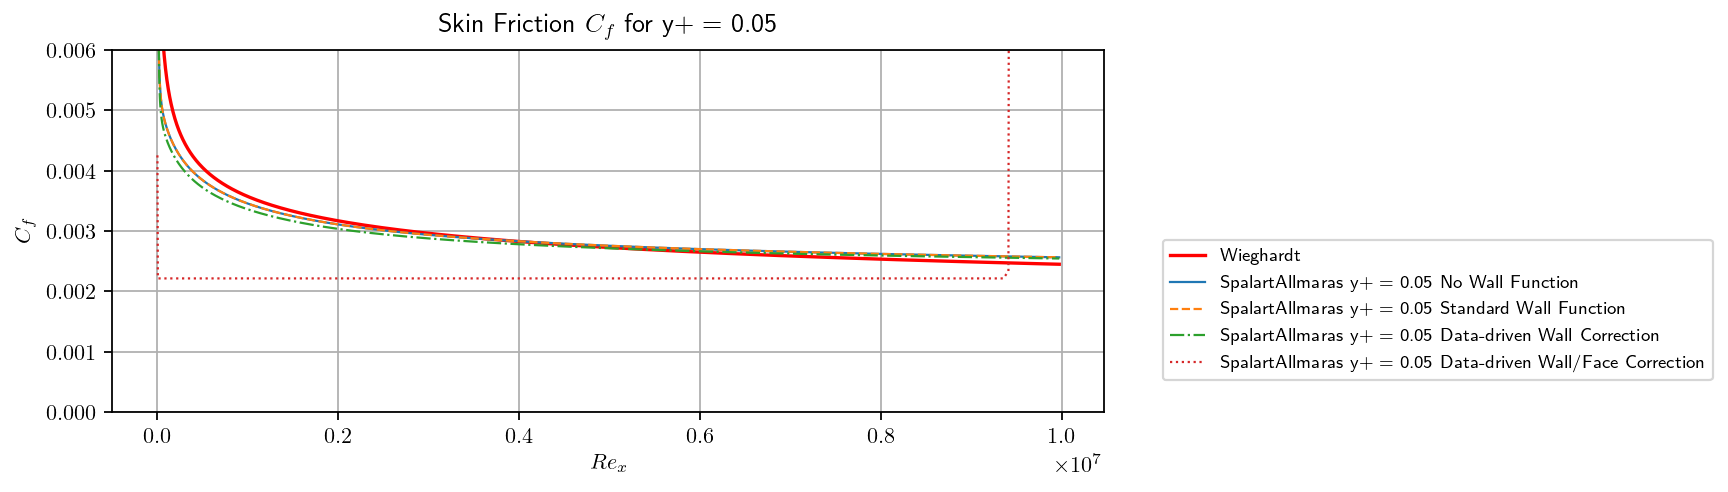

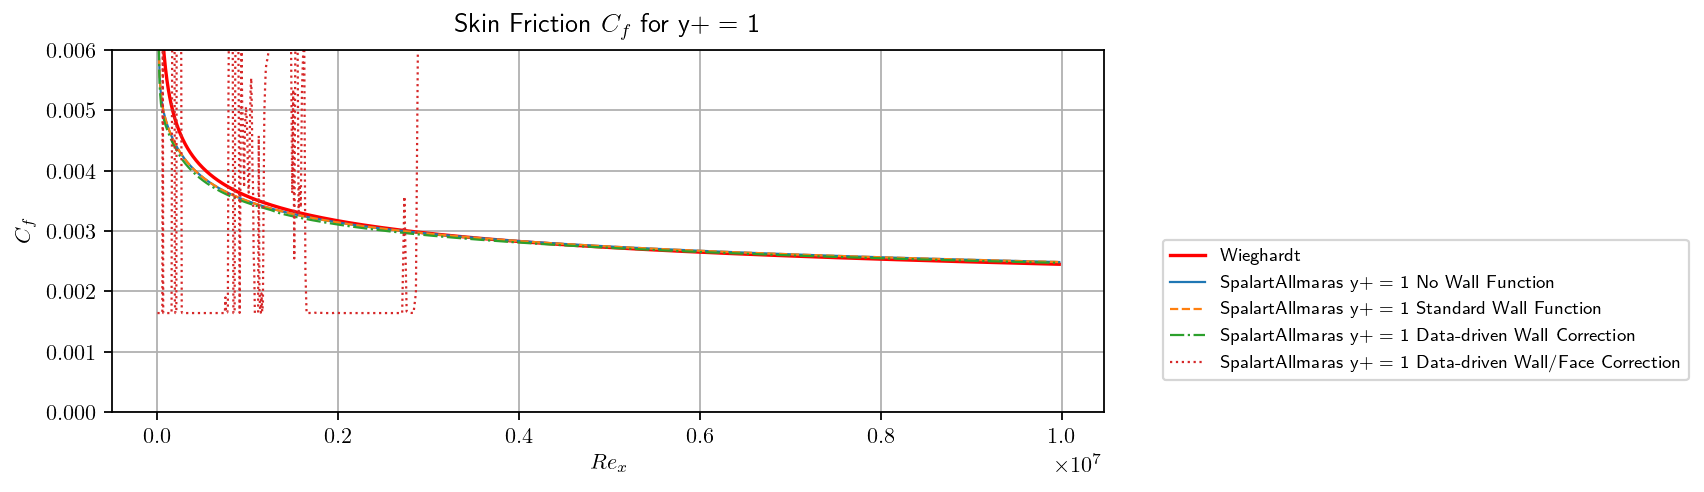

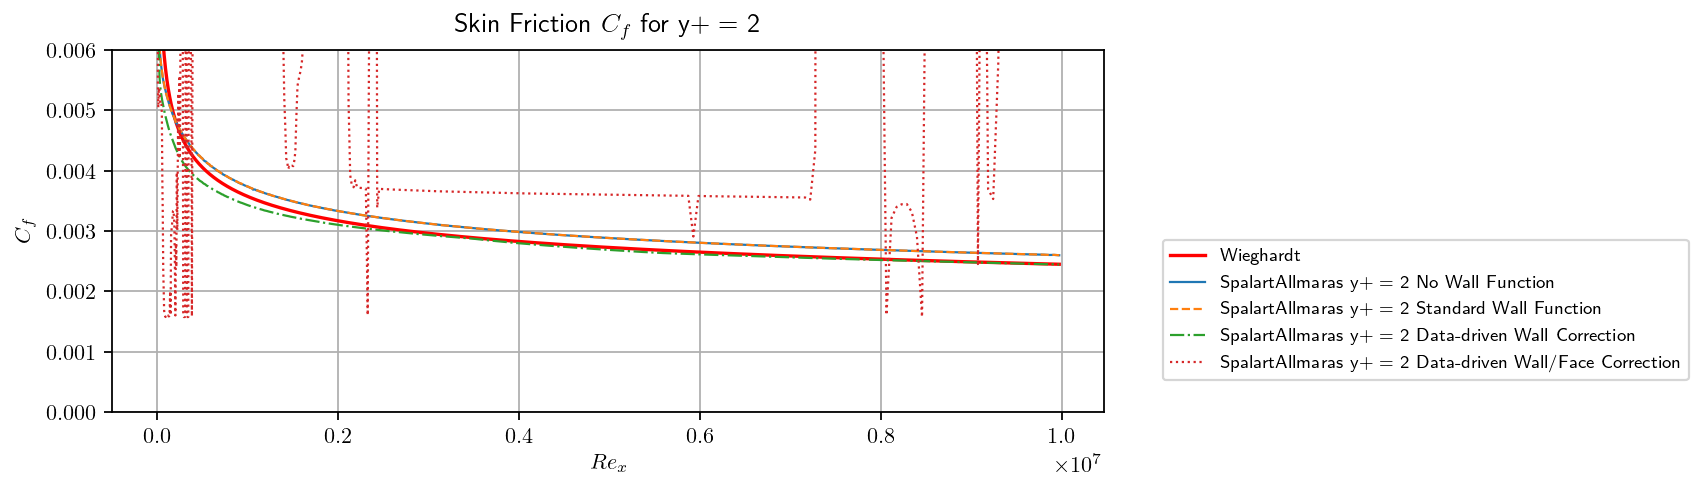

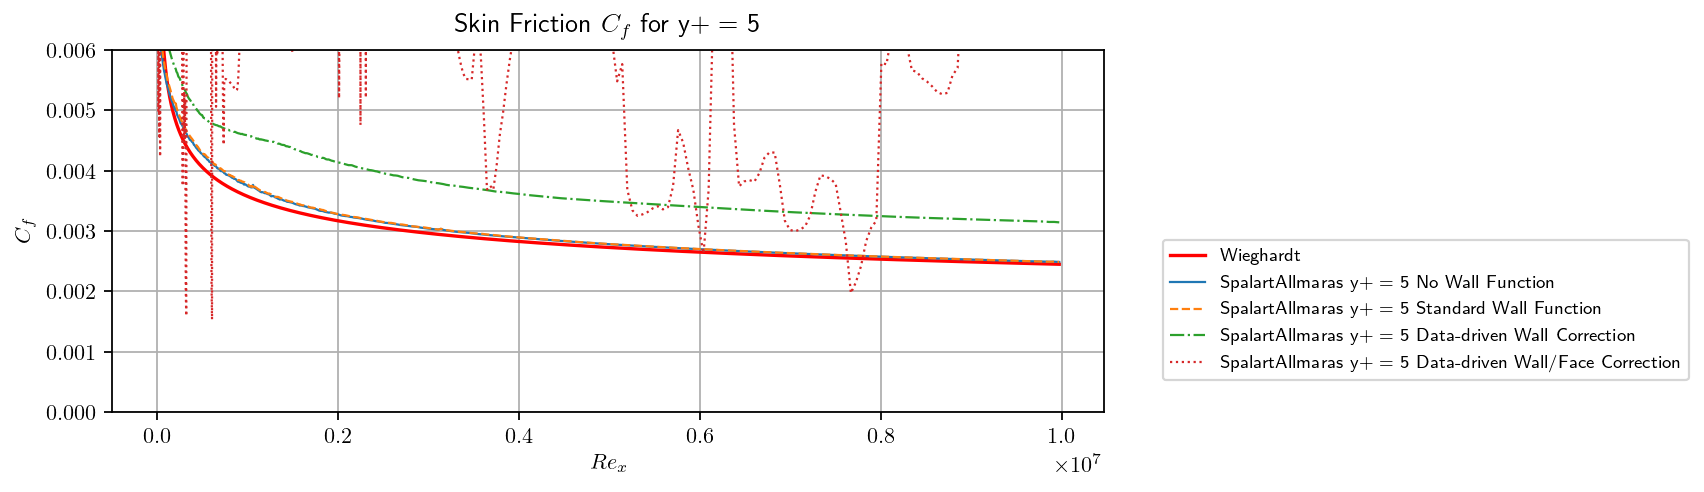

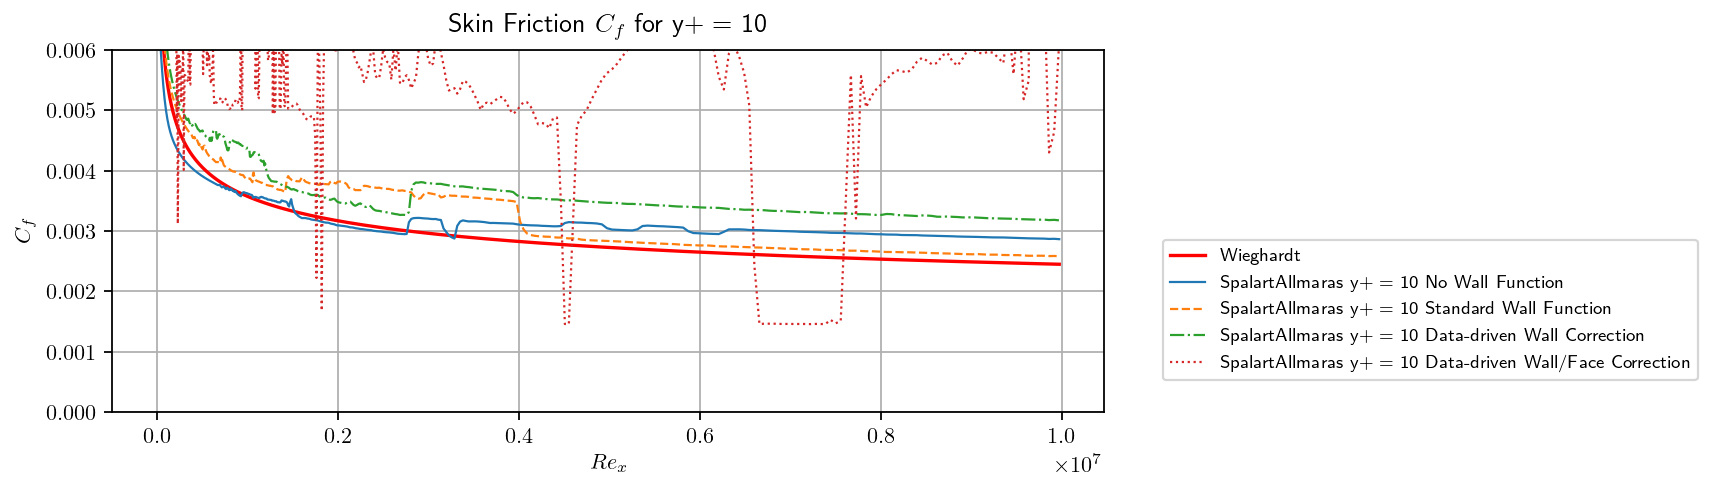

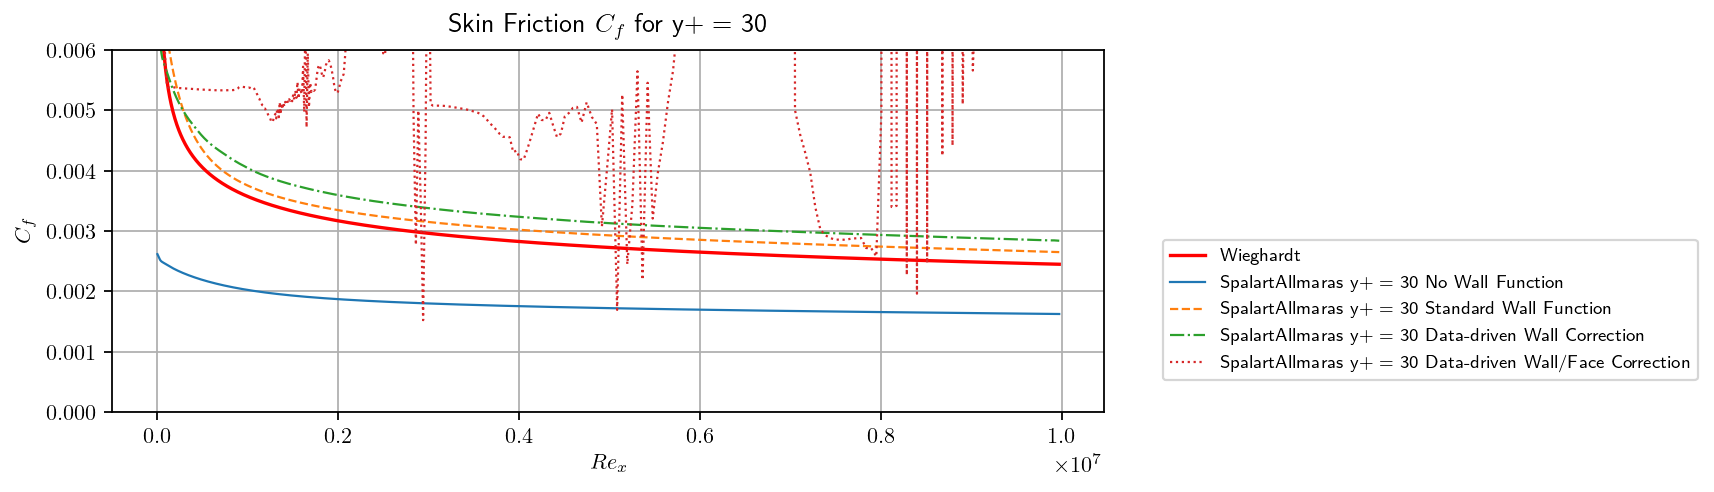

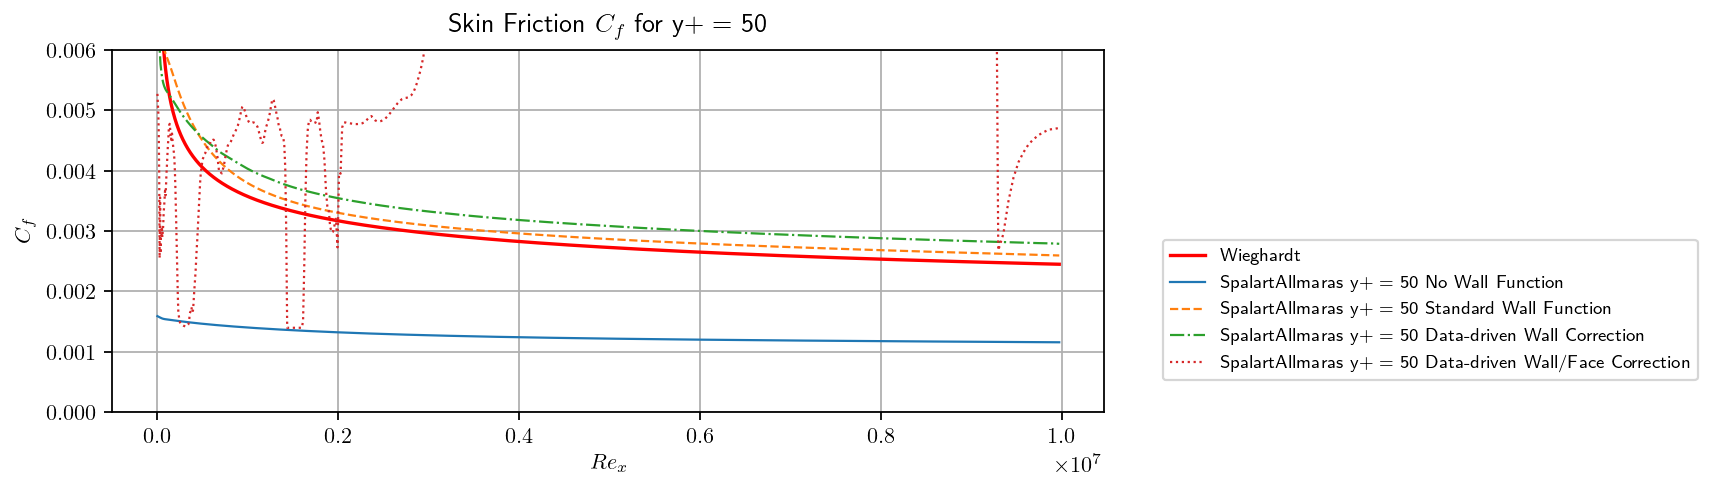

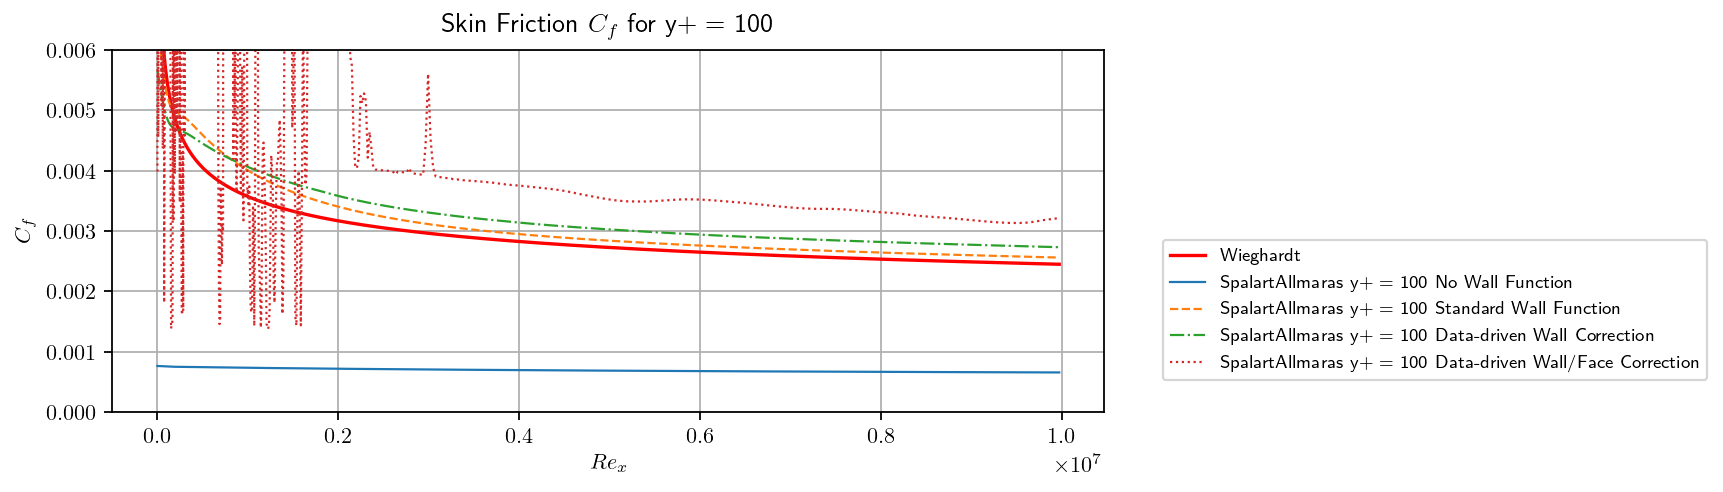

In [12]:
style = ["-", "--", "-.", ":"]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {}".format(yp[j]))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")    
    for i in range(len(res_list)):
        ax.plot(Rex, Cf_nowall[i + len(res_list)*j], label = "{} y+ = {} No Wall Function".format(model_sa, yp[j]), ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.plot(Rex, Cf_wall[i + len(res_list)*j], label = "{} y+ = {} Standard Wall Function".format(model_sa, yp[j]), ls = style[i+1], c = "C{:d}".format(i+1), lw = lw)
        ax.plot(Rex, Cf_ddwall[i + len(res_list)*j], label = "{} y+ = {} Data-driven Wall Correction".format(model_sa, yp[j]), ls = style[i+2], c = "C{:d}".format(i+2), lw = lw)
        ax.plot(Rex, Cf_ddface[i + len(res_list)*j], label = "{} y+ = {} Data-driven Wall/Face Correction".format(model_sa, yp[j]), ls = style[i+3], c = "C{:d}".format(i+3), lw = lw)
        ax.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.5))        

### Comparison *Cf* of data-driven wall function with the correction at the wall for different *y+*

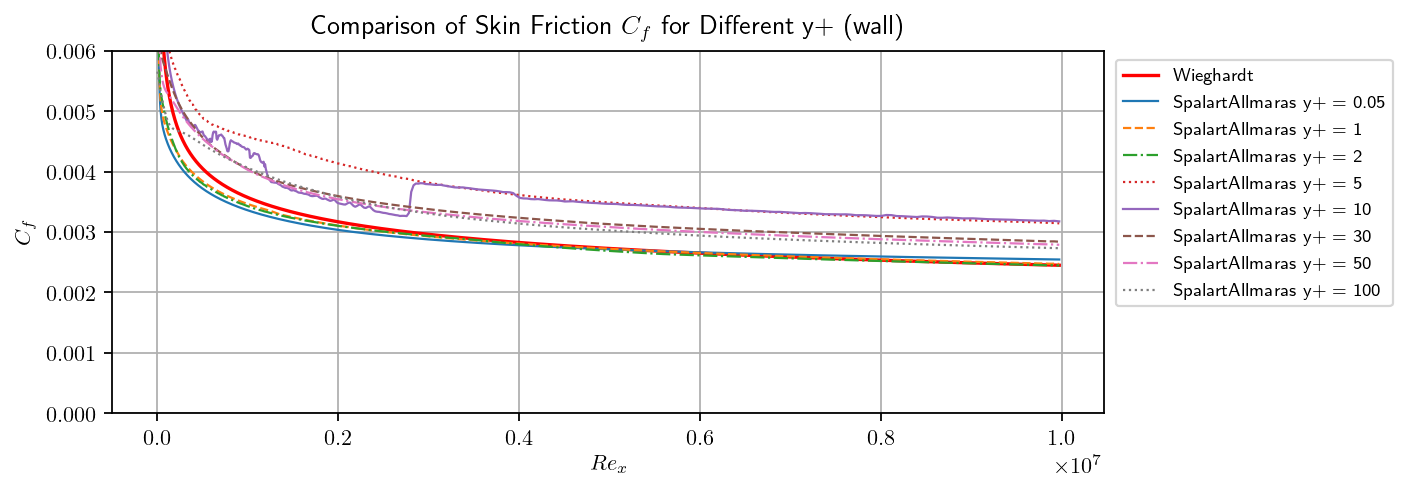

In [13]:
style2 = ["-", "--", "-.", ":"]
lw2 = 1.0
stylecycler = cycle(style2)

fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax2.set_xlabel(r"$Re_x$")
ax2.set_ylabel(r"$C_f$")
plt.title(r"Comparison of Skin Friction $C_f$ for Different y+ (wall)")
ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax2.plot(Rex, Cf_ddwall[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax2.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))        

### Comparison *Cf* of data-driven wall function with the correction at the first face for different *y+*

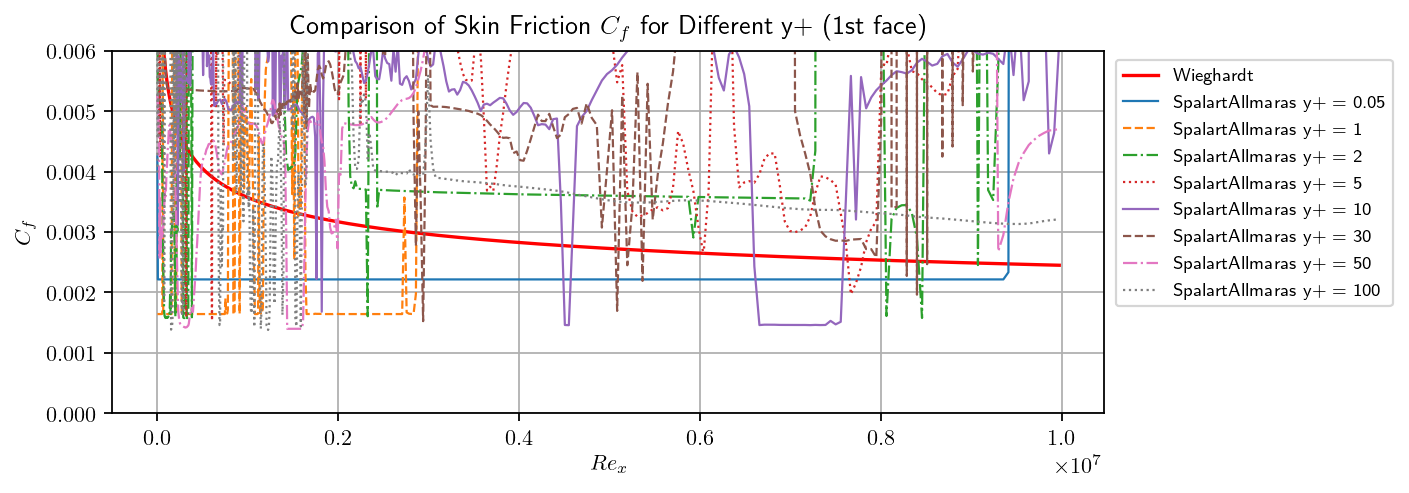

In [11]:
style3 = ["-", "--", "-.", ":"]
lw3 = 1.0
stylecycler2 = cycle(style3)

fig3, ax3 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax3.set_xlabel(r"$Re_x$")
ax3.set_ylabel(r"$C_f$")
plt.title(r"Comparison of Skin Friction $C_f$ for Different y+ (1st face)")
ax3.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax3.plot(Rex, Cf_ddface[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler2), c = "C{:d}".format(j), lw = lw3)
        ax3.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))        